                                                        CODSOFT Task 2

                                                  Sales Prediction Using python

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
adv = pd.read_csv("advertising.csv")
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


                                                    Describe the data set

In [3]:
adv.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
adv.shape

(200, 4)

In [5]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
adv.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
#Basic Observations
#Avg expense spend is highest on TV
#Avg expense spend is lowest on Radio

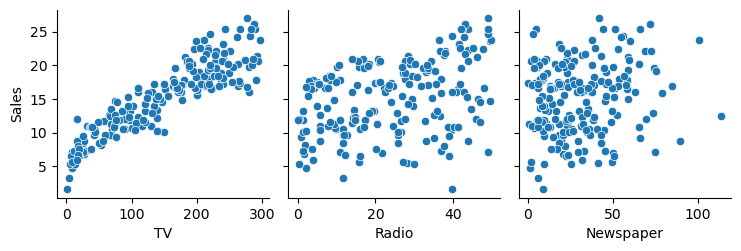

In [11]:
sns.pairplot(adv,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='scatter')
#Pair Plot Obsewrvation:When advertising cost increases in TV Ads the sales will increase as well while the newspaper and radio it is bit unpredictable

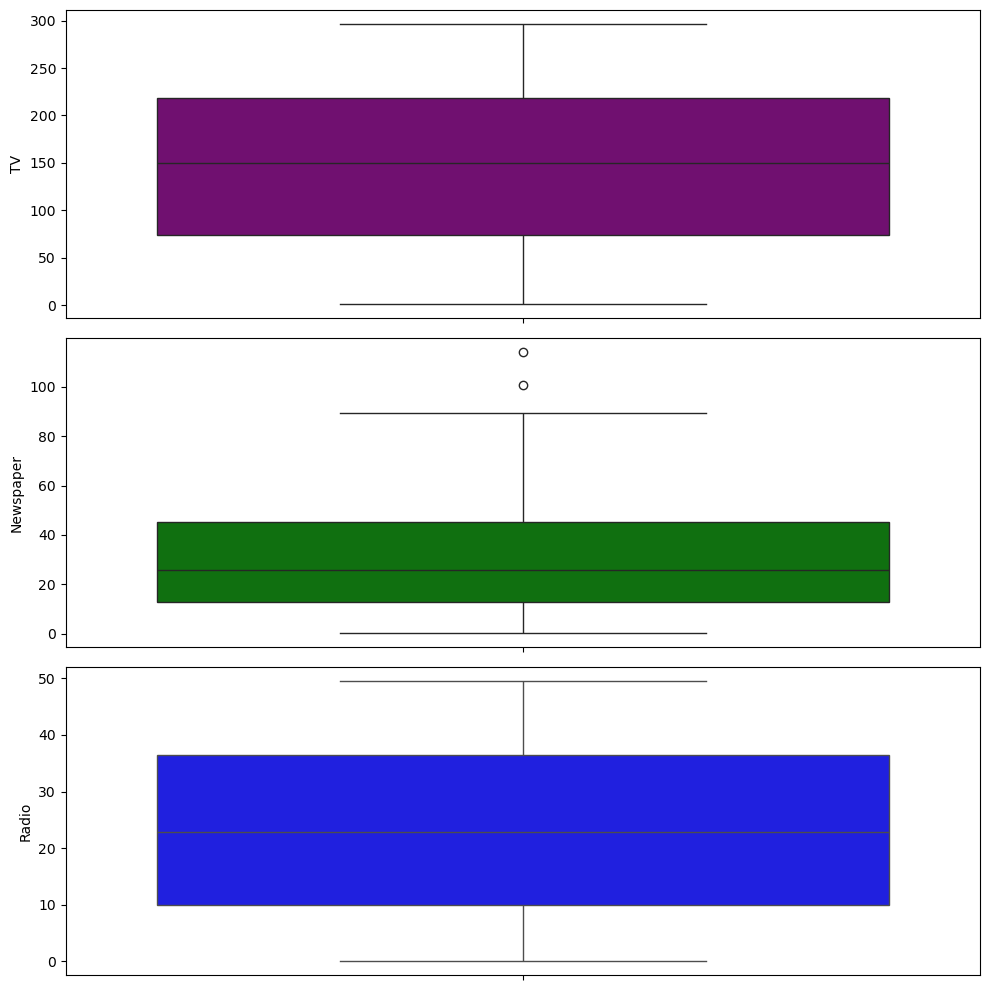

In [29]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt1=sns.boxplot(adv['TV'],color='purple',ax = axs[0])
plt2=sns.boxplot(adv['Newspaper'],color='green',ax = axs[1])
plt1=sns.boxplot(adv['Radio'],color='blue',ax = axs[2])
plt.tight_layout()

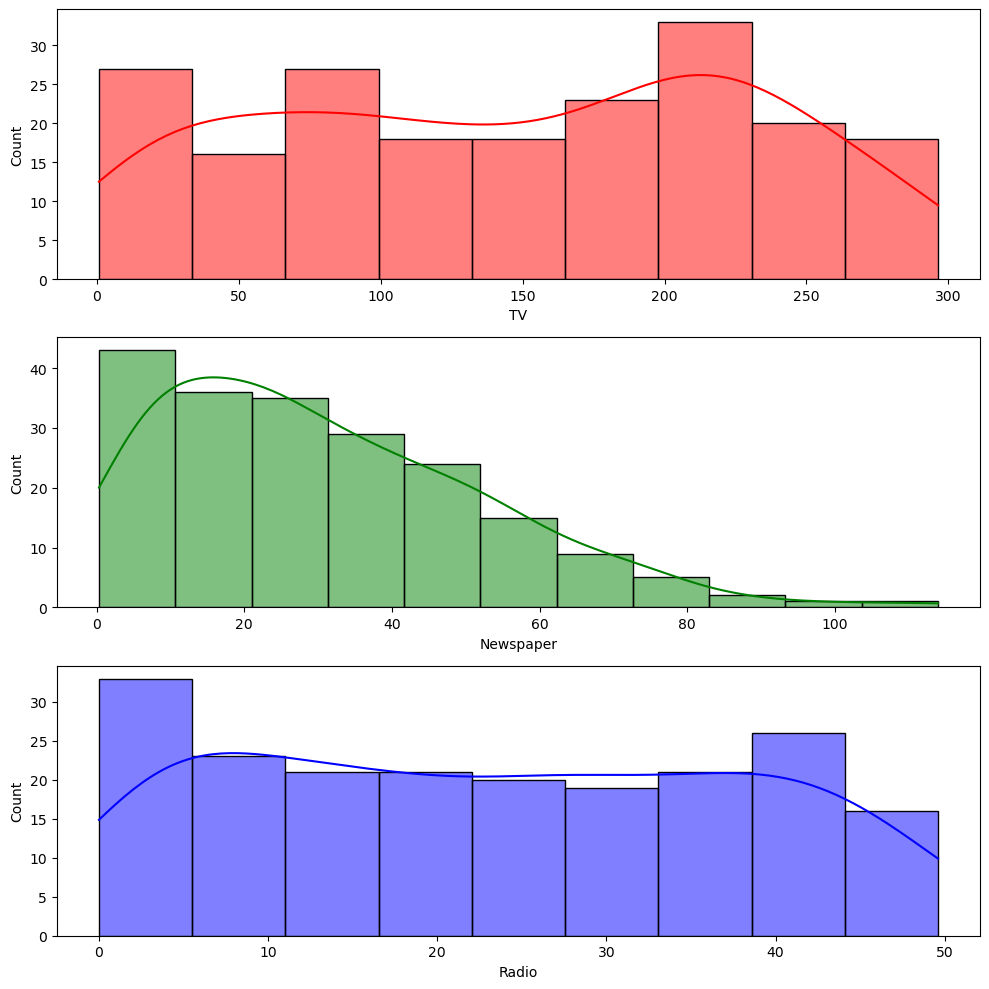

In [13]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt4=sns.histplot(adv['TV'],color='red',kde=True,ax = axs[0])
plt5=sns.histplot(adv['Newspaper'],color='green',kde=True,ax = axs[1])   #The majority says in the result of low advertising cost is Newspaper
plt6=sns.histplot(adv['Radio'],color='blue',kde=True,ax = axs[2])
plt.tight_layout()

<Axes: >

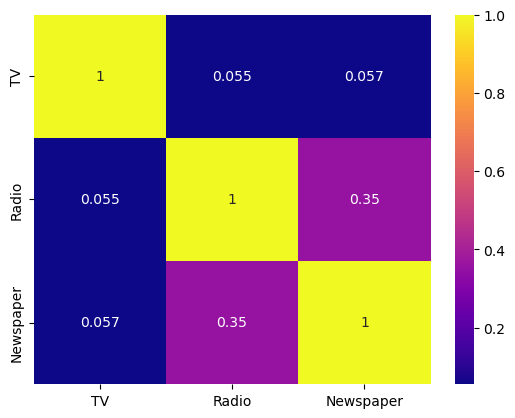

In [14]:
corr=adv[['TV','Radio','Newspaper']].corr()
sns.heatmap(corr,annot=True,cmap='plasma')

                                          FITTING THE DATA SET WITH APPROPRIATE MODEL

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
x_test=adv[['TV','Radio','Newspaper']]
y_test=adv['Sales']

In [17]:
import statsmodels.api as sm

In [18]:
x_test=sm.add_constant(x_test)
reg=sm.OLS(y_test,x_test)            #Ordinary Least Square
model=reg.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           8.13e-99
Time:                        21:31:13   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

In [19]:
residual=model.resid
residual

0      0.879028
1     -0.868248
2      1.503791
3     -0.812447
4      2.255863
         ...   
195    0.494510
196    3.719059
197   -0.459287
198    0.917780
199    0.214880
Length: 200, dtype: float64

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_test,y_test,test_size=0.2,random_state=22)

In [21]:
len(x_train),len(x_test),len(y_train),len(y_test)

(160, 40, 160, 40)

In [23]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
y_predict=lr.predict(x_test)
y_predict

array([11.50507377, 12.84657448, 10.04888489, 25.09113852, 17.37413795,
        8.05165564,  6.34463349,  8.52288741, 20.86952766, 10.67375447,
        6.90960915, 21.3370343 , 21.14114468, 19.63689246, 15.26478613,
       10.59635524, 21.76659335, 23.73688945, 12.24645122,  9.96345917,
       16.48537769, 20.26806554, 20.25869843, 15.95683049, 15.8195745 ,
       18.01683959, 12.26397709,  9.64733425, 17.92498036, 23.68316413,
       13.2979892 , 17.52679223,  8.84379613, 13.26050311,  9.7435341 ,
       10.59426893, 16.60937563, 18.29939873, 11.2821882 ,  9.37792978])

In [32]:
lr.coef_

array([0.        , 0.05426408, 0.10949392, 0.00608807])

In [34]:
lr.intercept_

4.4275336080756365

In [25]:
y_test

144    12.3
157    10.1
32     13.2
98     25.4
163    18.0
78      5.3
91      7.3
170     8.4
124    19.7
75      8.7
189     6.7
176    20.2
104    20.7
20     18.0
87     16.0
46     10.6
128    24.7
36     25.4
135    11.6
12      9.2
194    17.3
92     19.4
142    20.1
160    16.4
50     16.4
199    18.4
73     11.0
166     8.0
41     17.1
30     21.4
161    13.3
3      16.5
66     11.0
180    15.5
191    11.9
13     13.7
99     17.2
153    16.0
6      11.8
158     7.3
Name: Sales, dtype: float64

In [30]:
x_train

,const,TV,Radio,Newspaper
61,1.0,261.3,42.7,54.7
151,1.0,121.0,8.4,48.7
31,1.0,112.9,17.4,38.6
150,1.0,280.7,13.9,37.0
148,1.0,38.0,40.3,11.9
...,...,...,...,...
100,1.0,222.4,4.3,49.8
192,1.0,17.2,4.1,31.6
44,1.0,25.1,25.7,43.3
132,1.0,8.4,27.2,2.1


In [31]:
x_test

,const,TV,Radio,Newspaper
144,1.0,96.2,14.8,38.9
157,1.0,149.8,1.3,24.3
32,1.0,97.2,1.5,30.0
98,1.0,289.7,42.3,51.2
163,1.0,163.5,36.8,7.4
78,1.0,5.4,29.9,9.4
91,1.0,28.6,1.5,33.0
170,1.0,50.0,11.6,18.4
124,1.0,229.5,32.3,74.2
75,1.0,16.9,43.7,89.4


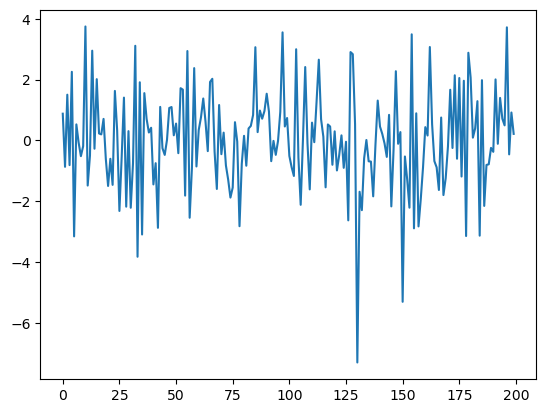

In [35]:
plt.plot(residual)

<Axes: ylabel='Count'>

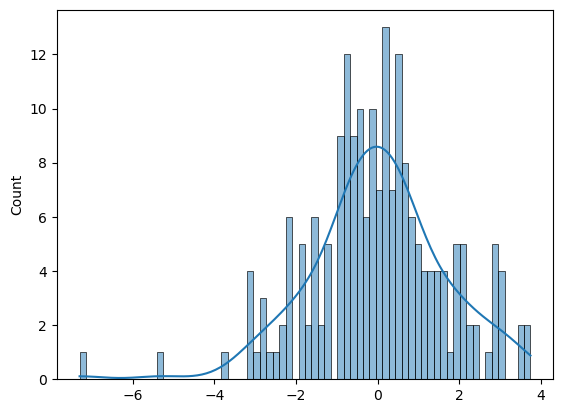

In [26]:
sns.histplot(residual,bins=70,kde=True)